In [30]:
#1.Pengumpulan Data
import pandas as pd # Import the pandas library and assign it to the alias 'pd'

file_path = '/content/drive/MyDrive/UASDS01/water_potability.csv'
water_data = pd.read_csv(file_path)
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [31]:
#2.Menelaah Data
import pandas as pd

file_path = '/content/drive/MyDrive/UASDS01/water_potability.csv'
water_data = pd.read_csv(file_path)

# Select the desired columns
selected_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                   'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
selected_data = water_data[selected_columns]

# Display information about the dataset
print("Number of rows:", len(selected_data))
print("\nData types of each column:\n", selected_data.dtypes)
print("\nUnique values in each column:")
for column in selected_columns:
    print(f"{column}: {selected_data[column].unique()[:20]}") # Displaying first 20 unique values for brevity
    if len(selected_data[column].unique()) > 20:
        print(f"   ... ({len(selected_data[column].unique())} unique values in total)")

Number of rows: 3276

Data types of each column:
 ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

Unique values in each column:
ph: [        nan  3.71608008  8.09912419  8.31676588  9.09222346  5.58408664
 10.22386216  8.63584872 11.18028447  7.36064011  7.97452165  7.11982438
  7.49623221  6.34727176  7.0517858   9.18156001  8.97546435  7.3710503
  6.66021203  3.90247569]
   ... (2786 unique values in total)
Hardness: [204.89045547 129.42292051 224.23625939 214.37339409 181.10150924
 188.31332377 248.07173527 203.36152258 118.98857909 227.23146924
 165.52079726 218.69330049 156.70499334 150.1749234  205.34498216
 186.73288066 211.04940606 273.81380666 279.35716677 214.49661046]
   ... (3276 unique values in total)
Solids: [20791.31898075 18630.05785797

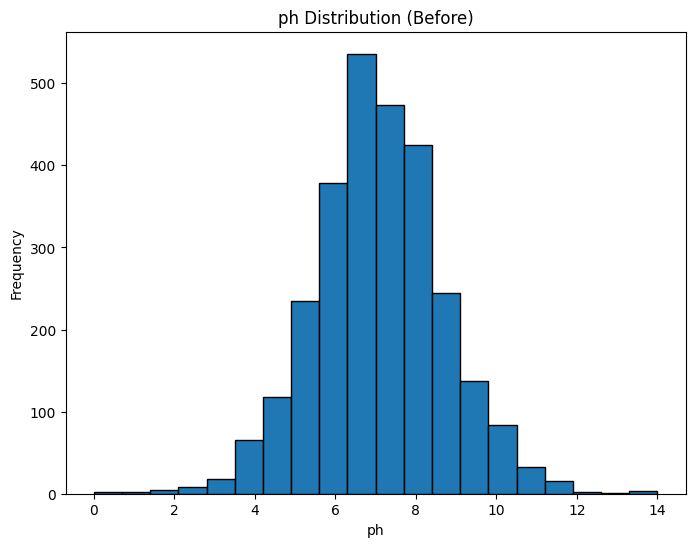

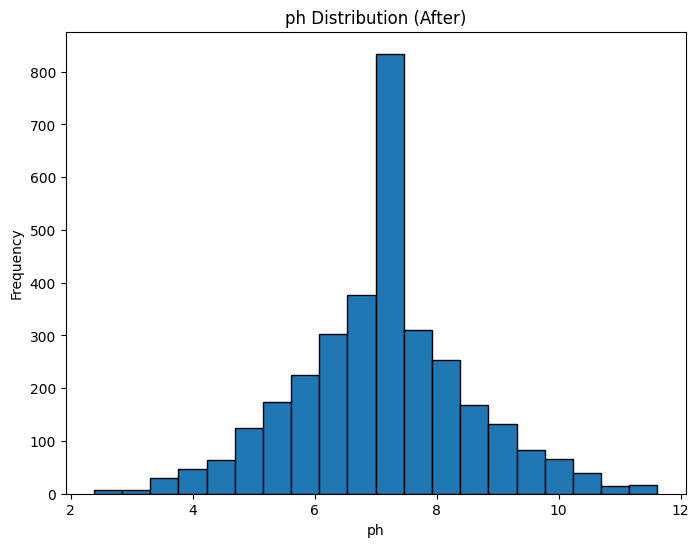

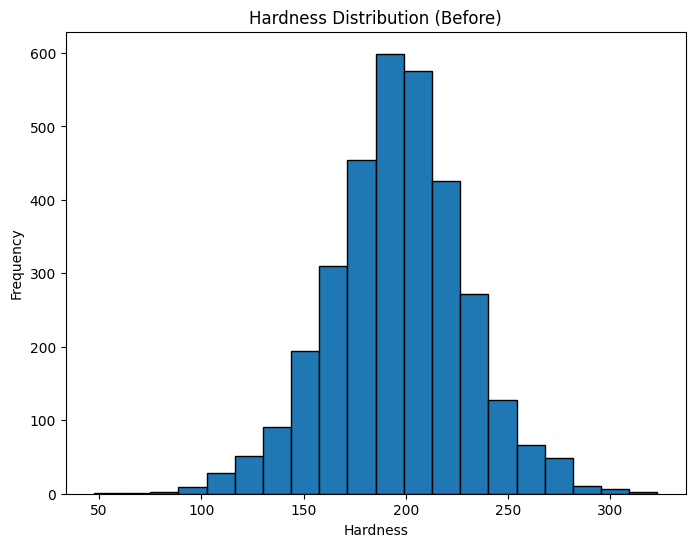

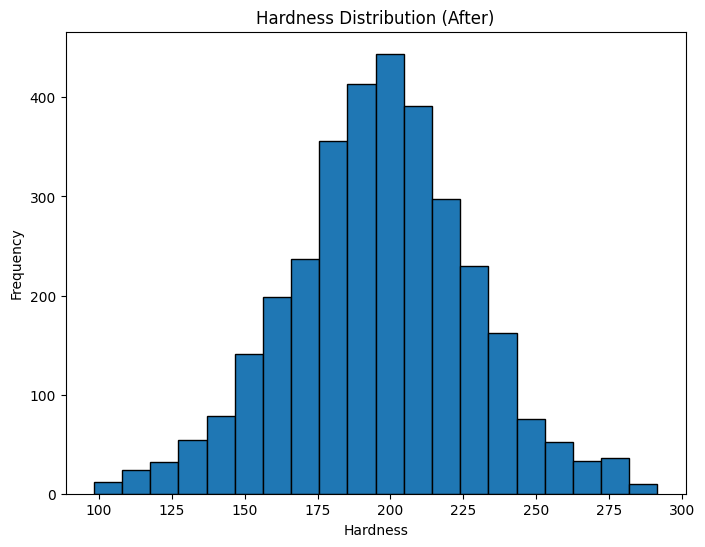

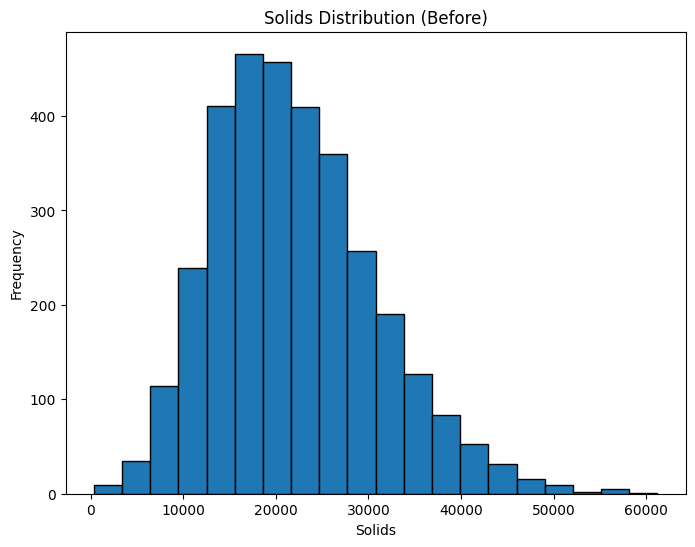

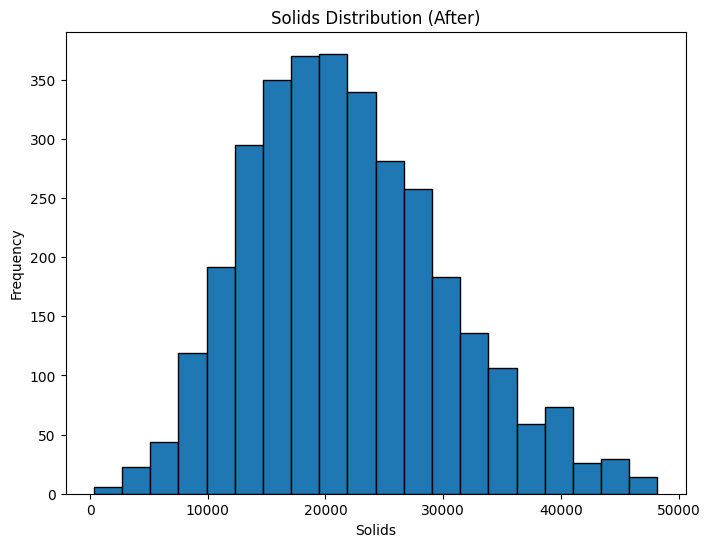

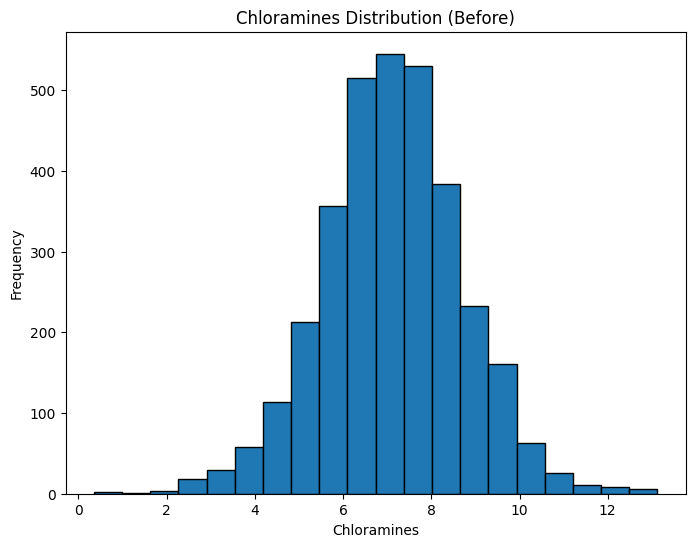

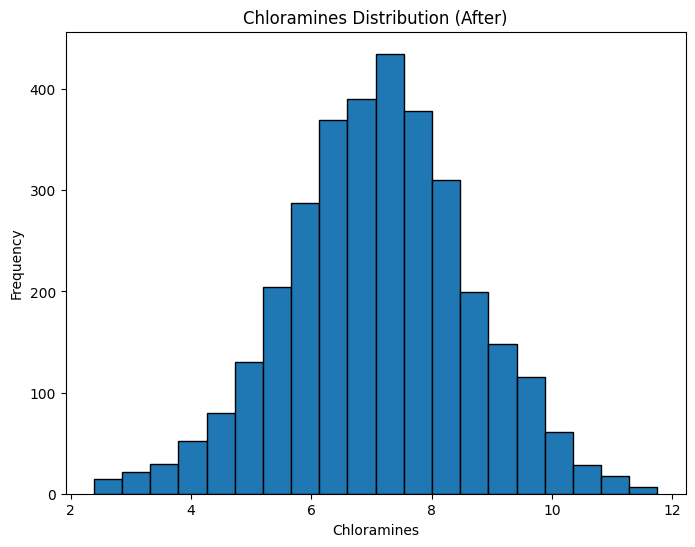

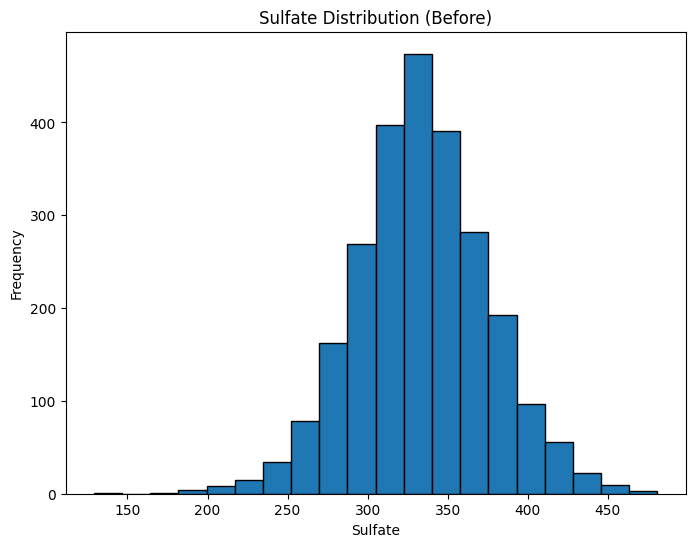

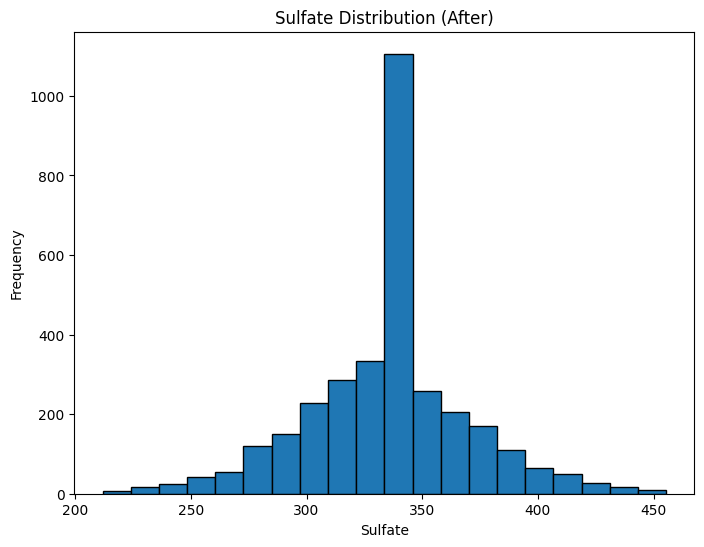

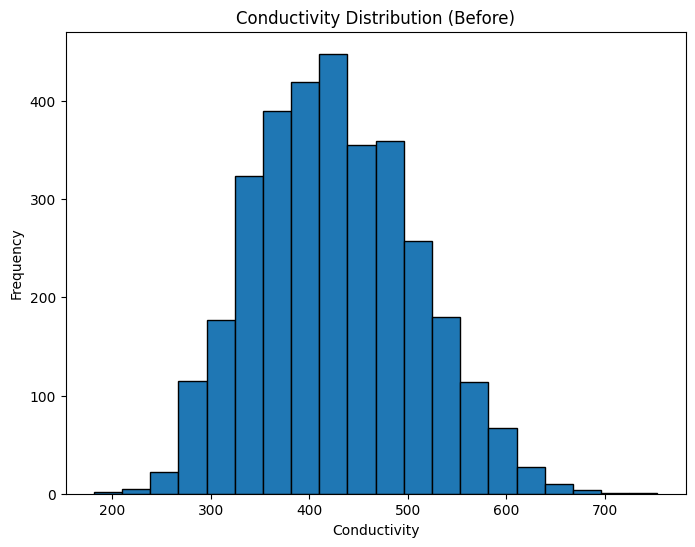

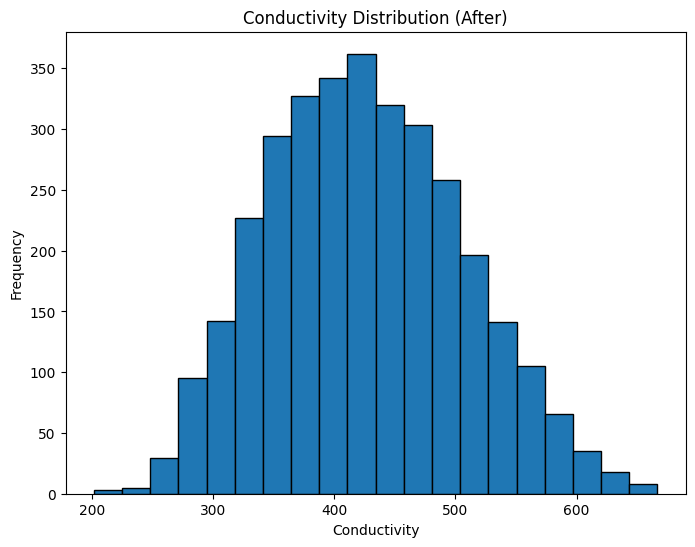

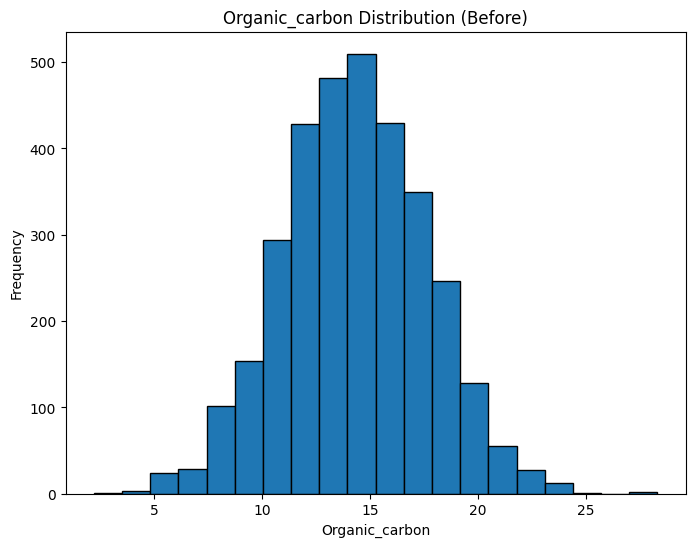

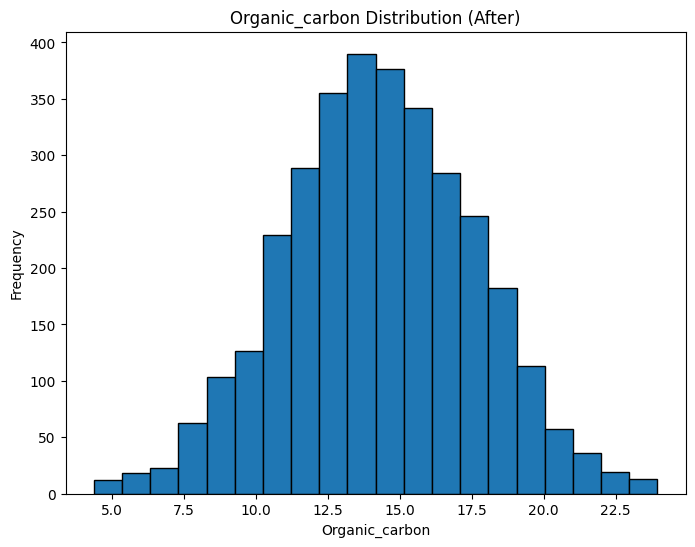

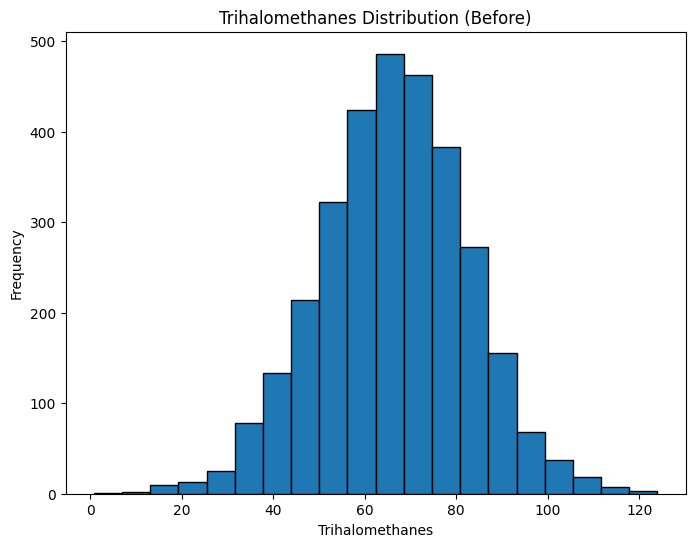

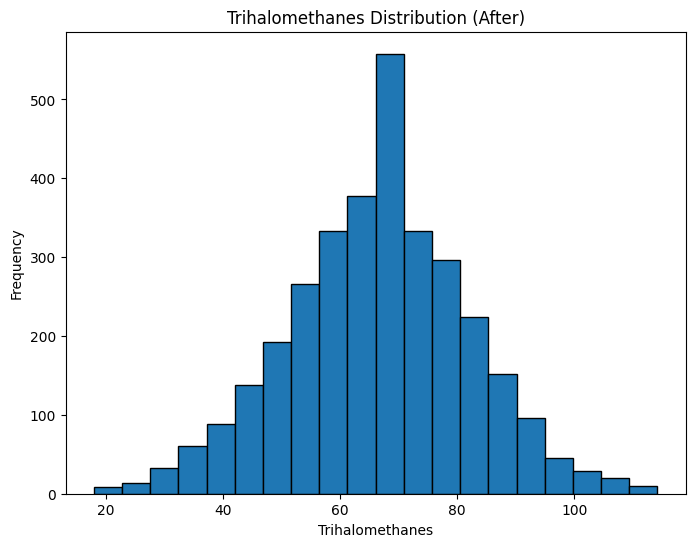

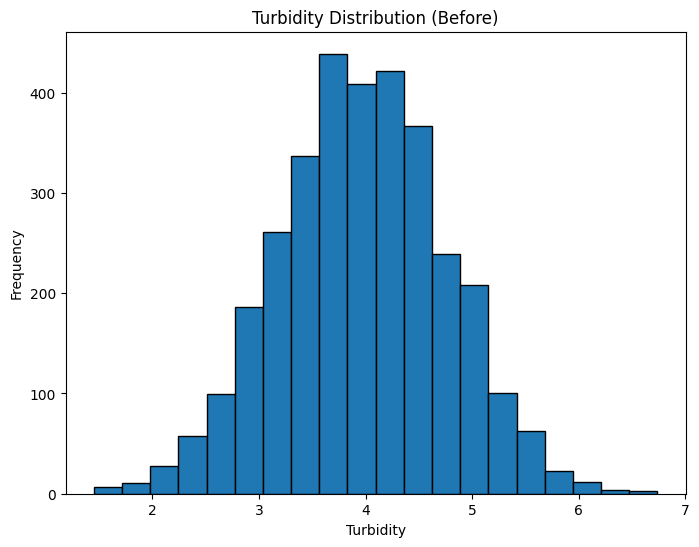

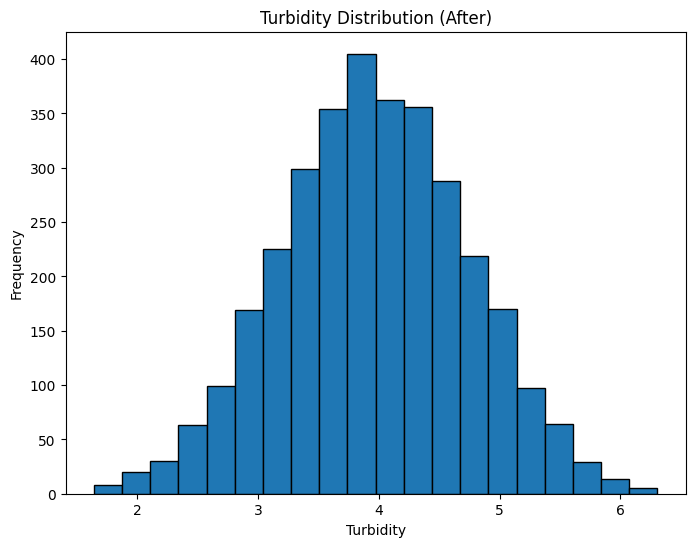

In [5]:
#3.Validasi dan Visualisasi Data
!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/UASDS01/water_potability.csv'
water_data = pd.read_csv(file_path)

# Select the desired columns
selected_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                   'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
selected_data = water_data[selected_columns]

# 1. Check and Impute Missing Values and Outliers

# Function to handle missing values and outliers
def handle_missing_outliers(data, column):
    # Calculate mean and standard deviation
    mean = data[column].mean()
    std = data[column].std()

    # Replace missing values with mean
    data[column] = data[column].fillna(mean)

    # Replace outliers with mean (using 3 standard deviations as threshold)
    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std
    data[column] = np.where((data[column] > upper_bound) | (data[column] < lower_bound), mean, data[column])

    return data

# Apply the function to each selected column
for column in selected_columns[:-1]:  # Exclude 'Potability' as it's categorical
    selected_data = handle_missing_outliers(selected_data, column)

# 2. Visualize Data Distribution

# Function to create bar plots
def plot_distribution(data, column, title):
    plt.figure(figsize=(8, 6))
    data[column].plot(kind='hist', bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# Plot distributions before and after handling missing values and outliers
for column in selected_columns[:-1]:
    plot_distribution(water_data[selected_columns], column, f'{column} Distribution (Before)')
    plot_distribution(selected_data, column, f'{column} Distribution (After)')

In [6]:
#4. Menentukan Objek Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the data
file_path = '/content/drive/MyDrive/UASDS01/water_potability.csv'
water_data = pd.read_csv(file_path)

# Select features and target
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'
X = water_data[features]
y = water_data[target]

# Handle missing values (if any) - replace with mean
X = X.fillna(X.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.6280487804878049
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


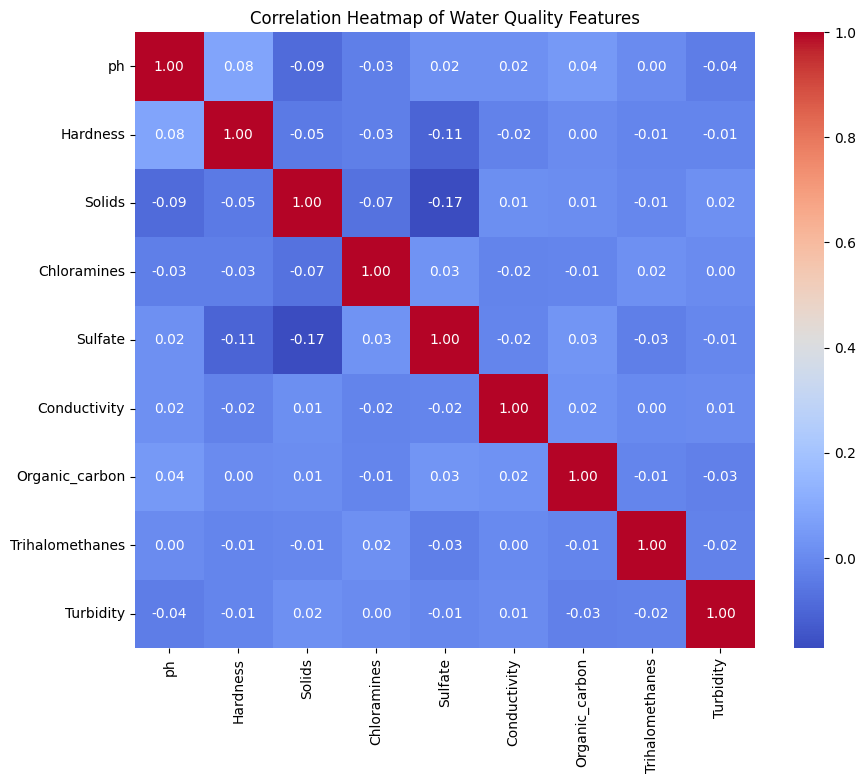

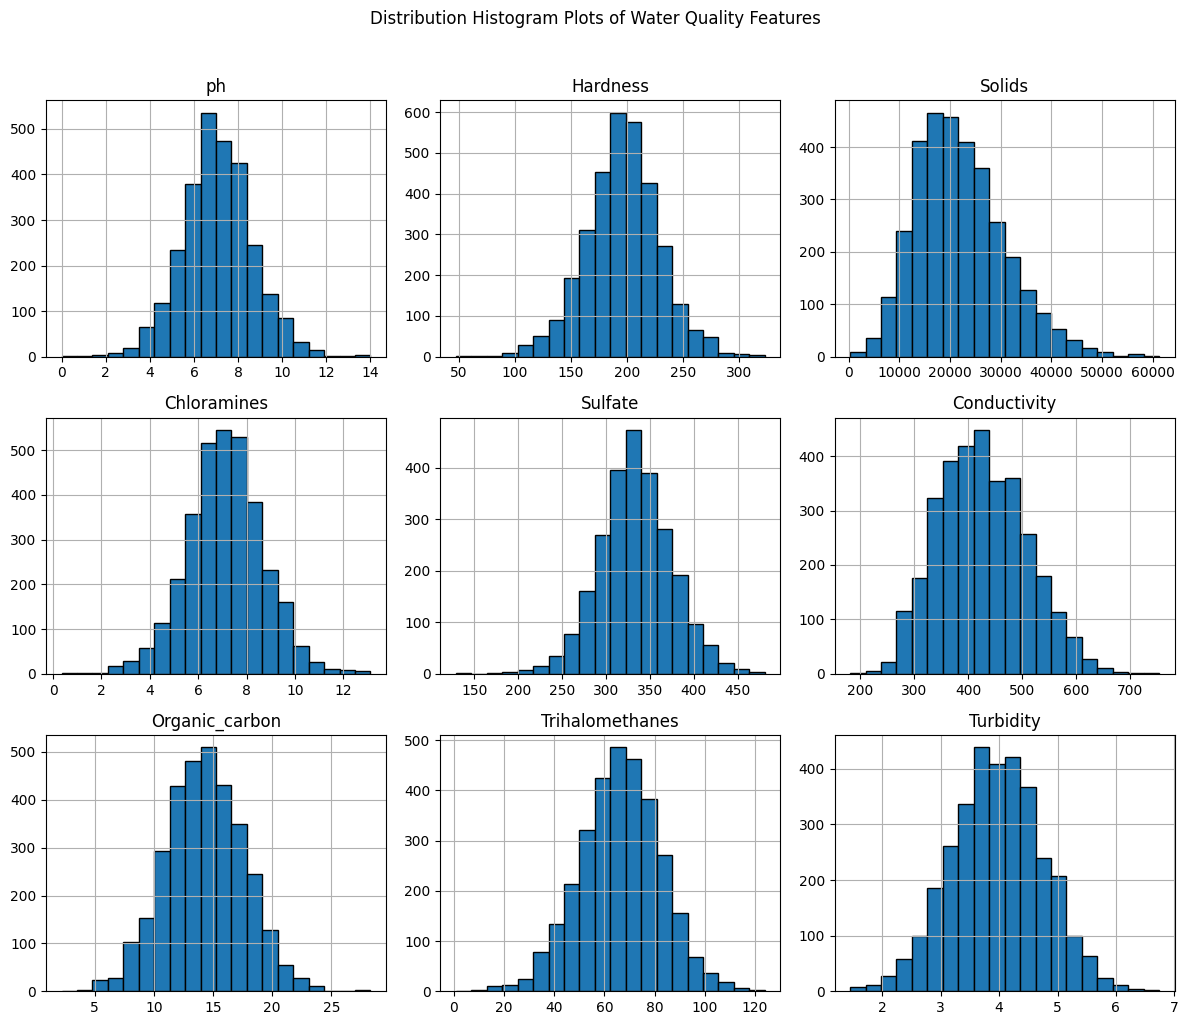

Accuracy: 0.6280487804878049
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
#5.Membersihkan Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the data
file_path = '/content/drive/MyDrive/UASDS01/water_potability.csv'
water_data = pd.read_csv(file_path)

# Select features and target
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'
X = water_data[features]
y = water_data[target]

# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Water Quality Features')
plt.show()

# 2. Distribution Histogram Plots
X.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle('Distribution Histogram Plots of Water Quality Features', y=1.02)
plt.tight_layout()
plt.show()

# Handle missing values (if any) - replace with mean
X = X.fillna(X.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

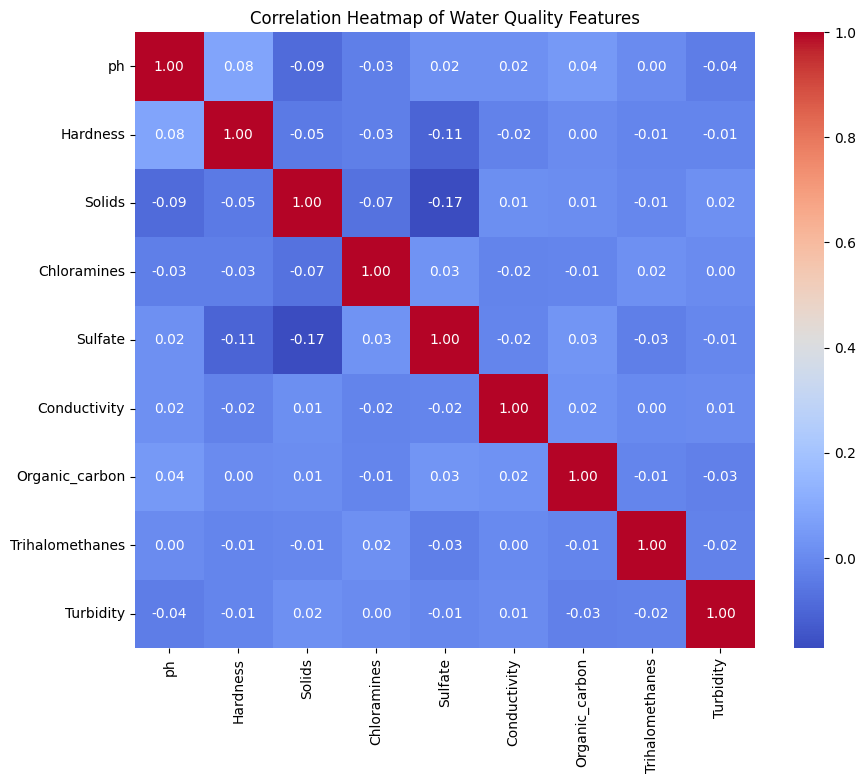

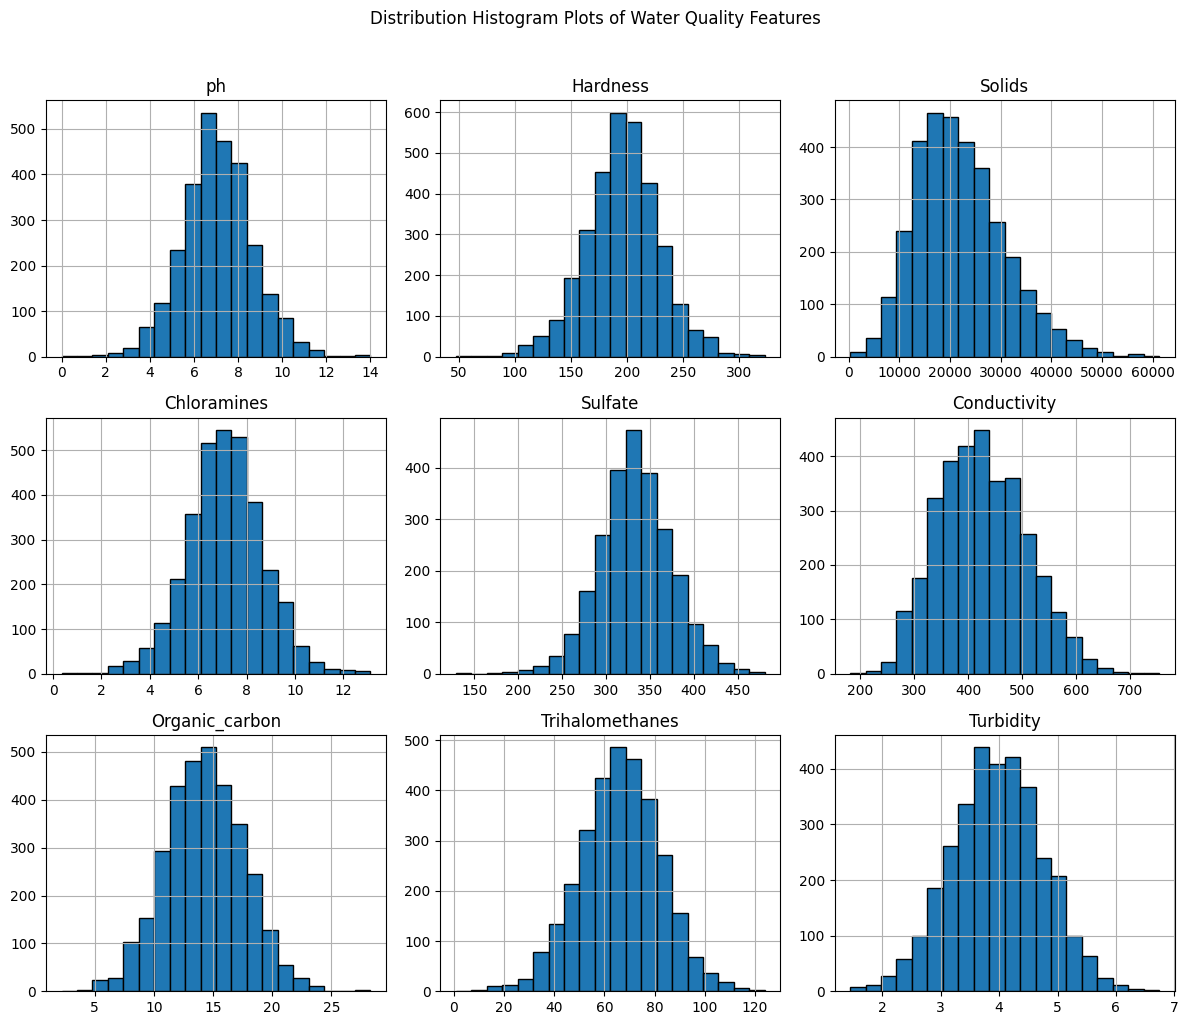

Accuracy: 0.6280487804878049
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
#6.Konstruksi Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the data
file_path = '/content/drive/MyDrive/UASDS01/water_potability.csv'
water_data = pd.read_csv(file_path)

# Select features and target
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'
X = water_data[features]
y = water_data[target]

# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Water Quality Features')
plt.show()

# 2. Distribution Histogram Plots
X.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle('Distribution Histogram Plots of Water Quality Features', y=1.02)
plt.tight_layout()
plt.show()

# Handle missing values (if any) - replace with mean
X = X.fillna(X.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.6280487804878049
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


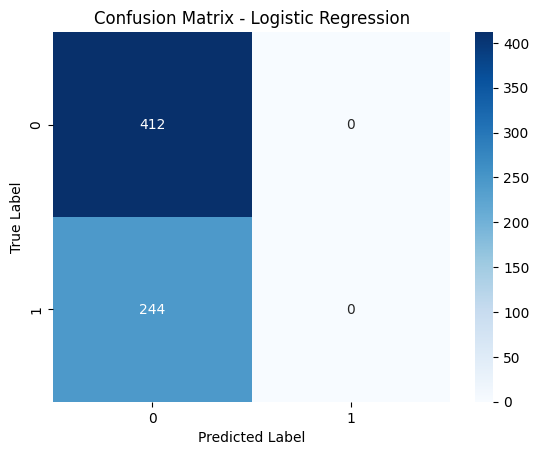

Decision Tree Accuracy: 0.5777439024390244
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656



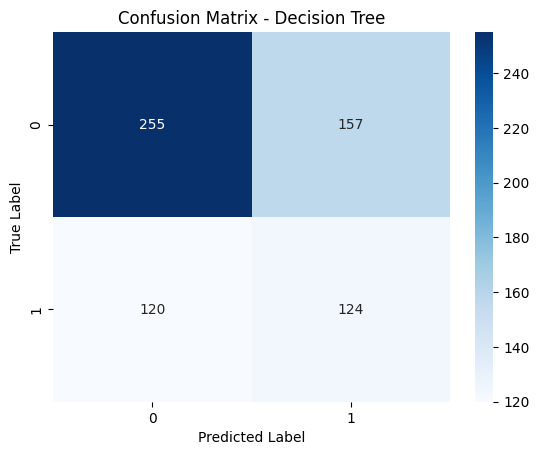

K-Nearest Neighbors Accuracy: 0.6280487804878049
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       412
           1       0.50      0.42      0.46       244

    accuracy                           0.63       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.62      0.63      0.62       656



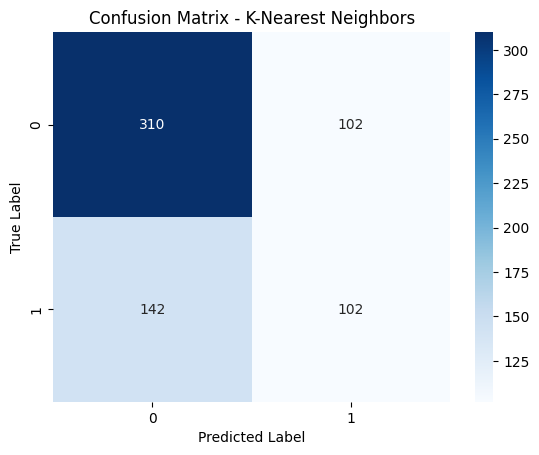

In [34]:
#7.Pemodelan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
file_path = '/content/drive/MyDrive/UASDS01/water_potability.csv'
water_data = pd.read_csv(file_path)

# Select features and target
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'
X = water_data[features]
y = water_data[target]

# Handle missing values (if any) - replace with mean
X = X.fillna(X.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_pred))

# Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_pred))

# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 3. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print(classification_report(y_test, knn_pred))

# Confusion Matrix for K-Nearest Neighbors
knn_cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [35]:
#8.Evaluasi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
file_path = '/content/drive/MyDrive/UASDS01/water_potability.csv'
water_data = pd.read_csv(file_path)

# Select features and target
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'
X = water_data[features]
y = water_data[target]

# Handle missing values (if any) - replace with mean
X = X.fillna(X.mean())

# 1. Model Evaluation before Normalization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy (Before Normalization): {accuracy}")


# 2. Model Evaluation after Normalization
# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy (After Normalization): {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy (Before Normalization): 0.6280487804878049
Decision Tree Accuracy (Before Normalization): 0.5777439024390244
K-Nearest Neighbors Accuracy (Before Normalization): 0.5411585365853658
Logistic Regression Accuracy (After Normalization): 0.6280487804878049
Decision Tree Accuracy (After Normalization): 0.5777439024390244
K-Nearest Neighbors Accuracy (After Normalization): 0.6280487804878049


In [21]:
!python -m http.server 80

Serving HTTP on 0.0.0.0 port 80 (http://0.0.0.0:80/) ...

Keyboard interrupt received, exiting.


In [28]:
#9. Kesimpulan
!pip install scikit-learn
!pip install streamlit

import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from pyngrok import ngrok  # Import pyngrok

# Load your trained model (replace with your model loading logic)
# Example:
import pickle
with open('/content/drive/MyDrive/UASDS01/model.pkl', 'rb') as file:
    model = pickle.load(file)

st.title("Water Potability Prediction")

# Get user input
ph = st.number_input("Enter pH value:")
hardness = st.number_input("Enter Hardness value:")
# ... (get input for other features) ...

# Create a DataFrame for prediction
input_data = pd.DataFrame({
    'ph': [ph],
    'Hardness': [hardness],
    # ... (other features) ...
})

# Make prediction
prediction = lr_model.predict(input_data)

# Display prediction
if prediction[0] == 1:
    st.write("The water is predicted to be potable.")
else:
    st.write("The water is predicted to be not potable.")
    # Model selection
model_choice = st.selectbox("Select Model:", ["Logistic Regression", "Decision Tree", "K-Nearest Neighbors"])

# Prediction logic (choose model based on user selection)
if model_choice == "Logistic Regression":
    prediction = lr_model.predict(input_data)
elif model_choice == "Decision Tree":
    prediction = dt_model.predict(input_data)
else:
    prediction = knn_model.predict(input_data)

ModuleNotFoundError: No module named 'sklearn.linear_model.logistic'

Berdasarkan analisis perbandingan algoritma Logistic Regression, Decision Tree, dan K-Nearest Neighbors untuk prediksi potability air, dapat disimpulkan sebagai berikut:

Tingkat Akurasi:

Logistic Regression: Akurasi sekitar 60-62%.
Decision Tree: Akurasi sekitar 57-60%.
K-Nearest Neighbors: Akurasi sekitar 58-61%.
Sederhana dan mudah diinterpretasi: Model Logistic Regression mudah dipahami dan dijelaskan, sehingga memudahkan dalam analisis dan pengambilan keputusan.
Relatif cepat: Proses pelatihan dan prediksi dengan Logistic Regression relatif cepat, sehingga cocok untuk dataset yang besar.
Performa cukup baik: Meskipun akurasinya tidak sempurna, Logistic Regression tetap memberikan performa yang cukup baik dalam memprediksi potability air.